# **Predictive Modeling**

*   Predictive Modeling is commonaly use statastical technique to predict future behaviour
*   It is a form of data mining technology that worked bt historical and currunt data and generating a model to help predicting future outcomes.

# **SVM (Support vector machine)**

* SVM is a superwise machine learning tachnique which can be use for regression and classification.



In [35]:
import numpy as np
import matplotlib.pyplot as plt

x = []
y = []
with open("/content/drive/MyDrive/datasets/data.txt","r") as f:
  for data in f.readlines():
    data = data.split(',')
    x.append([float(i) for i in data[:2]])
    y.append(float(data[2]))

x = np.array(x)
y = np.array(y)

class0 = np.array([x[i] for i in range(len(x)) if y[i]==0])
class1 = [x[i] for i in range(len(x)) if y[i]==1]


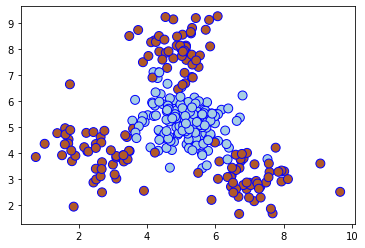

In [36]:
plt.scatter(x[:,0],x[:,1],c=y,s=80,cmap=plt.cm.Paired,edgecolors='blue',linewidths=1)

## Linear SVM

In [37]:
from sklearn import model_selection
xtrain,xtest,ytrain,ytest = model_selection.train_test_split(x,y,train_size=0.75,random_state=5)

In [38]:
from sklearn.svm import SVC
params = {'kernel':'linear'}
svmc = SVC(**params)
svmc.fit(xtrain,ytrain)
ytest_predicted = svmc.predict(xtest)

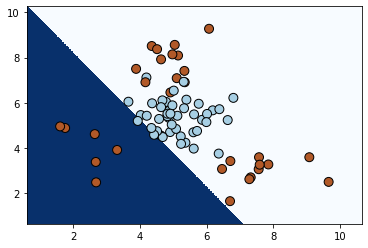

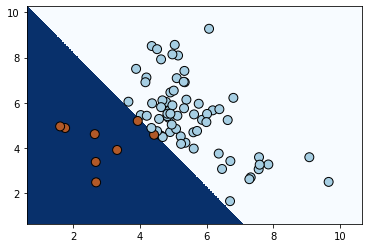

In [39]:
def plot_Graph(svmc,x,y):
  xmin,xmax = min(x[:,0])-1.0,max(x[:,0])+1.0
  ymin,ymax = min(x[:,1])-1.0,max(x[:,1])+1.0
  xdata,ydata = np.meshgrid(np.arange(xmin,xmax,0.01),np.arange(ymin,ymax,0.01))
  mesh_output = svmc.predict(np.c_[xdata.ravel(),ydata.ravel()])
  mesh_output = mesh_output.reshape(xdata.shape)
  plt.figure()
  plt.pcolormesh(xdata,ydata,mesh_output,cmap=plt.cm.Blues)
  plt.scatter(x[:,0],x[:,1],linewidths=1,c=y,s=80,edgecolors='black',cmap=plt.cm.Paired)
  plt.show()
plot_Graph(svmc,xtest,ytest)
plot_Graph(svmc,xtest,ytest_predicted)

## Classification Report

In [40]:
from sklearn.metrics import classification_report
print('Performance of linear SVM on Training dataset')
print('*' * 80)
target_names = ['class : '+str(int(i)) for i in set(y)]
print(classification_report(ytrain,svmc.predict(xtrain),target_names=target_names))
print('*' * 80)
print('Performance of linear SVM on Testing dataset')
print('*' * 80)
target_names = ['class : '+str(int(i)) for i in set(y)]
print(classification_report(ytest,ytest_predicted,target_names=target_names))
print('*' * 80)

Performance of linear SVM on Training dataset
********************************************************************************
              precision    recall  f1-score   support

   class : 0       0.55      0.88      0.68       105
   class : 1       0.78      0.38      0.51       120

    accuracy                           0.61       225
   macro avg       0.66      0.63      0.59       225
weighted avg       0.67      0.61      0.59       225

********************************************************************************
Performance of linear SVM on Testing dataset
********************************************************************************
              precision    recall  f1-score   support

   class : 0       0.64      0.96      0.77        45
   class : 1       0.75      0.20      0.32        30

    accuracy                           0.65        75
   macro avg       0.70      0.58      0.54        75
weighted avg       0.69      0.65      0.59        75

************

## Non-Linear SVM

In [41]:
params = {'kernel':'poly','degree':3}
svmc = SVC(**params)
svmc.fit(xtrain,ytrain)
ytest_predicted1 = svmc.predict(xtest)

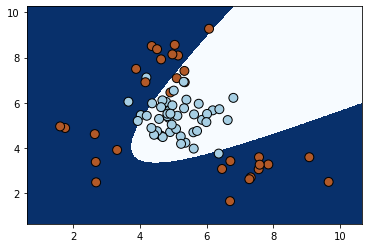

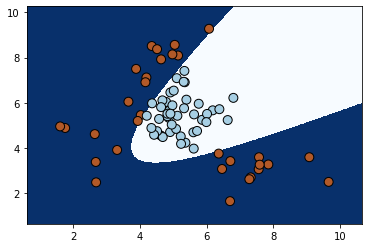

In [42]:
def plot_Graph(svmc,x,y):
  xmin,xmax = min(x[:,0])-1.0,max(x[:,0])+1.0
  ymin,ymax = min(x[:,1])-1.0,max(x[:,1])+1.0
  xdata,ydata = np.meshgrid(np.arange(xmin,xmax,0.01),np.arange(ymin,ymax,0.01))
  mesh_output = svmc.predict(np.c_[xdata.ravel(),ydata.ravel()])
  mesh_output = mesh_output.reshape(xdata.shape)
  plt.figure()
  plt.pcolormesh(xdata,ydata,mesh_output,cmap=plt.cm.Blues)
  plt.scatter(x[:,0],x[:,1],linewidths=1,c=y,s=80,edgecolors='black',cmap=plt.cm.Paired)
  plt.show()
plot_Graph(svmc,xtest,ytest)
plot_Graph(svmc,xtest,ytest_predicted1)

In [43]:
from sklearn.metrics import classification_report
print('Performance of non-linear SVM on Training dataset')
print('*' * 80)
target_names = ['class : '+str(int(i)) for i in set(y)]
print(classification_report(ytrain,svmc.predict(xtrain),target_names=target_names))
print('*' * 80)
print('Performance of linear SVM on Testing dataset')
print('*' * 80)
target_names = ['class : '+str(int(i)) for i in set(y)]
print(classification_report(ytest,ytest_predicted1,target_names=target_names))
print('*' * 80)

Performance of non-linear SVM on Training dataset
********************************************************************************
              precision    recall  f1-score   support

   class : 0       0.92      0.84      0.88       105
   class : 1       0.87      0.93      0.90       120

    accuracy                           0.89       225
   macro avg       0.89      0.89      0.89       225
weighted avg       0.89      0.89      0.89       225

********************************************************************************
Performance of linear SVM on Testing dataset
********************************************************************************
              precision    recall  f1-score   support

   class : 0       0.91      0.89      0.90        45
   class : 1       0.84      0.87      0.85        30

    accuracy                           0.88        75
   macro avg       0.87      0.88      0.88        75
weighted avg       0.88      0.88      0.88        75

********

## Radial Basis SVM

In [44]:
params = {'kernel':'rbf'}
svmc = SVC(**params)
svmc.fit(xtrain,ytrain)
ytest_predicted2 = svmc.predict(xtest)

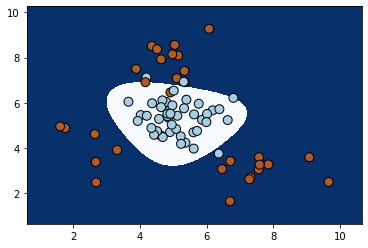

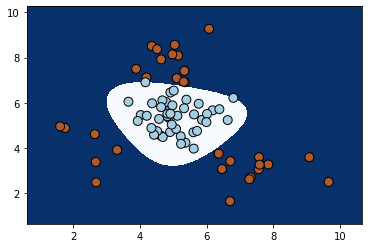

In [45]:
def plot_Graph(svmc,x,y):
  xmin,xmax = min(x[:,0])-1.0,max(x[:,0])+1.0
  ymin,ymax = min(x[:,1])-1.0,max(x[:,1])+1.0
  xdata,ydata = np.meshgrid(np.arange(xmin,xmax,0.01),np.arange(ymin,ymax,0.01))
  mesh_output = svmc.predict(np.c_[xdata.ravel(),ydata.ravel()])
  mesh_output = mesh_output.reshape(xdata.shape)
  plt.figure()
  plt.pcolormesh(xdata,ydata,mesh_output,cmap=plt.cm.Blues)
  plt.scatter(x[:,0],x[:,1],linewidths=1,c=y,s=80,edgecolors='black',cmap=plt.cm.Paired)
  plt.show()
plot_Graph(svmc,xtest,ytest)
plot_Graph(svmc,xtest,ytest_predicted2)

In [46]:
from sklearn.metrics import classification_report
print('Performance of non-linear Radial Basis SVM on Training dataset')
print('*' * 80)
target_names = ['class : '+str(int(i)) for i in set(y)]
print(classification_report(ytrain,svmc.predict(xtrain),target_names=target_names))
print('*' * 80)
print('Performance of linear SVM on Testing dataset')
print('*' * 80)
target_names = ['class : '+str(int(i)) for i in set(y)]
print(classification_report(ytest,ytest_predicted2,target_names=target_names))
print('*' * 80)

Performance of non-linear Radial Basis SVM on Training dataset
********************************************************************************
              precision    recall  f1-score   support

   class : 0       0.95      0.96      0.96       105
   class : 1       0.97      0.96      0.96       120

    accuracy                           0.96       225
   macro avg       0.96      0.96      0.96       225
weighted avg       0.96      0.96      0.96       225

********************************************************************************
Performance of linear SVM on Testing dataset
********************************************************************************
              precision    recall  f1-score   support

   class : 0       0.95      0.93      0.94        45
   class : 1       0.90      0.93      0.92        30

    accuracy                           0.93        75
   macro avg       0.93      0.93      0.93        75
weighted avg       0.93      0.93      0.93       